# QUANTIFICATION OF  Brn3a IN AN IMAGE

In [1]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
def Brn3aQuant(image, thres, resolution):
    imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Establish the threshold
    Threshold, bi_image = cv2.threshold(imagegray, thres, 255, cv2.THRESH_BINARY)
    plt.figure(figsize = (8,8))
    plot0 = plt.imshow(bi_image, cmap = 'gray')

    #finding countors
    imagecanny, contours = cv2.findContours(image = bi_image, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_NONE)
    
    if '20x' in resolution:
        #Draw and count identified cells
        l1, l2, l3, l4, l5, l6 = [],[],[],[],[],[]
        cells = 0
        for cnt in imagecanny:    
            #print(len(cnt))
            if 70 >= len(cnt) > 35:
                l1.append(cnt)
                cells = cells + 1
            if 140 >= len(cnt) > 70:
                l2.append(cnt)
                cells = cells + 2
            if 210 >= len(cnt) > 140:
                l3.append(cnt)
                cells = cells + 3
            if 280 >= len(cnt) > 210:
                l4.append(cnt)
                cells = cells + 4
            if 350 >= len(cnt) > 280:
                l5.append(cnt)
                cells = cells + 5
            if 420 >= len(cnt) > 350:
                l6.append(cnt)
                cells = cells + 6
      
    #draw the countors found
    cv2.drawContours(image = image, contours = l1, contourIdx = -1, color = (255,255,255), thickness = 2)
    cv2.drawContours(image = image, contours = l2, contourIdx = -1, color = (0,255,0), thickness = 2)
    cv2.drawContours(image = image, contours = l3, contourIdx = -1, color = (0,0,255), thickness = 2)
    cv2.drawContours(image = image, contours = l4, contourIdx = -1, color = (255,255,0), thickness = 2)
    cv2.drawContours(image = image, contours = l5, contourIdx = -1, color = (255,0,255), thickness = 2)
    cv2.drawContours(image = image, contours = l6, contourIdx = -1, color = (26,127,239), thickness = 2)    
    plt.figure(figsize = (8,8))
    plt.title('Reference: White, 1 cell; green, 2 cells; blue, 3 cells; Yellow: 4 cells; purple, 5 cells; orange, 6 cells')
    plot1 = plt.imshow(image)
    
    return plot0, plot1, print('Brn3a (+) cells =', cells)

In [7]:
#Open and read images
file_name = 'cntr brn3 I - Copy.tif'
path = 'C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\Inmunos\\brn3a\\{}'.format(file_name)      
image = cv2.imread(path)

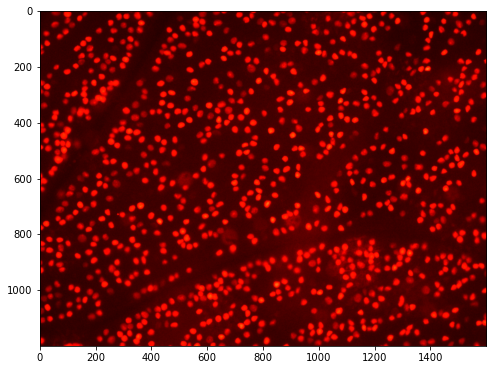

In [8]:
#ORIGINAL IMAGE
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (8,8))
plt.imshow(imageRGB)

Brn3a (+) cells = 848


(<matplotlib.image.AxesImage at 0x2256ba8fcd0>,
 None)

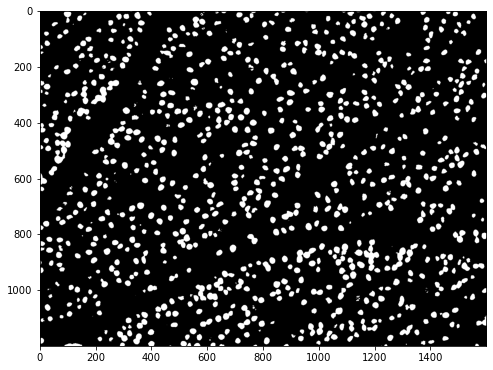

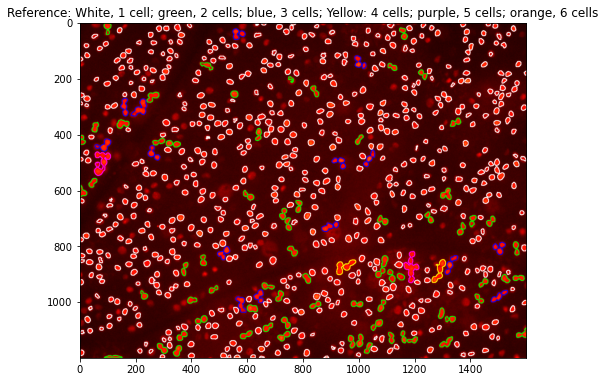

In [9]:
Brn3aQuant(imageRGB, 20, '20x')

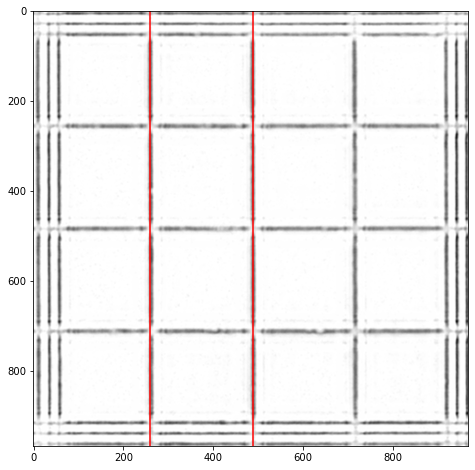

In [22]:
paths = "C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Reglas microscopio cora e inmunos patologicas\\40X regla corregida INMUNOS.tif"
scale = cv2.imread(paths)

#Scale of area
imagescale = cv2.cvtColor(scale, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (8,8))
plt.axvline(x = 260, color = 'red')
plt.axvline(x = 488, color = 'red')
plt.imshow(imagescale, cmap ='gray')

In [23]:
#number of ganglion cells / mm2
#for 40x resolution --> 228 pixels = 50 micrometros

image_width = (1600 * 50 / 228)*0.001 #milimetros
image_height = (1200 * 50 / 228)*0.001 #milimetros
area = image_width * image_height

Brn3a_cells = 802

n_ganglion_cells_per_area = int(2 * Brn3a_cells / area) #ganglionares/2mm^2
print('Brn3a (+) cells per area =', n_ganglion_cells_per_area)

Brn3a (+) cells per area = 17371


In [24]:
#Crop of the image (height,width)
#panel_1 = imageRGB[0:600,0:800]
#plt.figure(figsize = (10,10))
#plt.imshow(panel_1)

#panel_2 = imageRGB[600:1200,0:800]
#plt.figure(figsize = (10,10))
#plt.imshow(panel_2)

#panel_3 = imageRGB[0:600,0:800]
#plt.figure(figsize = (10,10))
#plt.imshow(panel_2)

#panel_4 = imageRGB[600:1200,800:1600]
#plt.figure(figsize = (10,10))
#plt.imshow(panel_4)

In [28]:
#Open and read images
file_name = 'cntr brn3 II - Copy.tif'
path = 'C:\\Users\\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\Inmunos\\brn3a\\{}'.format(file_name)      
image = cv2.imread(path)

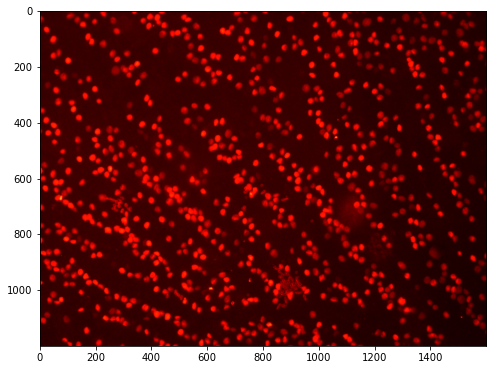

In [29]:
#ORIGINAL IMAGE
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (8,8))
plt.imshow(imageRGB)

Brn3a (+) cells = 765


(<matplotlib.image.AxesImage at 0x257cbe936d0>,
 None)

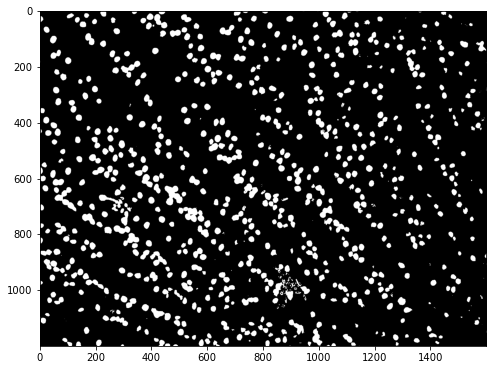

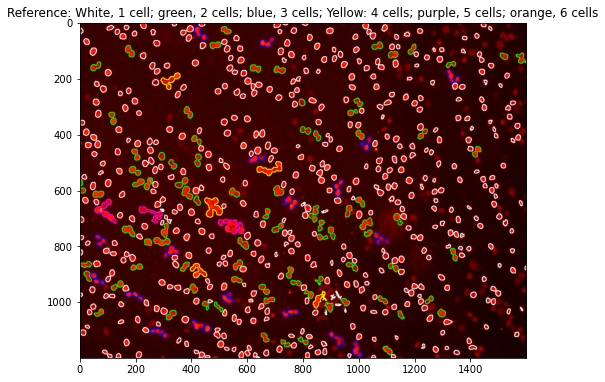

In [30]:
Brn3aQuant(imageRGB, 15, '20x')

In [31]:
#number of ganglion cells / mm2
#for 40x resolution --> 228 pixels = 50 micrometros

image_width = (1600 * 50 / 228)*0.001 #milimetros
image_height = (1200 * 50 / 228)*0.001 #milimetros
area = image_width * image_height

Brn3a_cells = 765

n_ganglion_cells_per_area = int(2 * Brn3a_cells / area) #ganglionares/2mm^2
print('Brn3a (+) cells per area =', n_ganglion_cells_per_area)

Brn3a (+) cells per area = 16569
